# **Evaluacion de Data set**
Tecnicatura en inteligencia artificial

Universidad Nacional de Hurlingham

Docente: Andrea Rey

Alumno : Nicolas Seivane

# *Exploracion de DATOS para INFORME*

https://archive.ics.uci.edu/dataset/193/cardiotocography

Se procesaron automáticamente 2126 cardiotocogramas fetales (CTG) y se midieron sus características diagnósticas. Tres obstetras expertos clasificaron los CTG y se les asignó una etiqueta de clasificación consensuada. La clasificación se realizó tanto con respecto a un patrón morfológico (A, B, C...) como al estado fetal (N, S, P). Por lo tanto, el conjunto de datos puede utilizarse para experimentos de 10 o 3 clases.

Información adicional

LB - FCF basal (latidos por minuto)
AC - # de aceleraciones por segundo
FM - # de movimientos fetales por segundo
UC - # de contracciones uterinas por segundo
DL - # de desaceleraciones ligeras por segundo
DS - # de desaceleraciones severas por segundo
DP - # de desaceleraciones prolongadas por segundo
ASTV - porcentaje de tiempo con variabilidad anormal a corto plazo
MSTV - valor medio de la variabilidad a corto plazo
ALTV - porcentaje de tiempo con variabilidad anormal a largo plazo
MLTV - valor medio de la variabilidad a largo plazo
Width - ancho del histograma de FCF
Min - mínimo del histograma de FCF
Max - máximo del histograma de FCF
Nmax - # de picos del histograma
Nzeros - # de ceros del histograma
Mode - moda del histograma
Mean - media del histograma
Median - mediana del histograma
Variance - varianza del histograma
Tendency - tendencia del histograma
CLASS - código de clase del patrón de FCF (1 a 10) 
NSP - código de clasificación del estado fetal (N=normal; S=sospechoso; P=patológico)

In [2]:
import pandas as pd
import sklearn as sk
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    log_loss,
    cohen_kappa_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


# .head()
# .info()
# .isnull().any()
# df.column.value_counts()
# .max()
# .min()
# .describe()


In [8]:
datos = pd.read_csv("C:\\Users\\User\\Documents\\Proyecto integrador\\cirrhosis\\cirrhosis.csv")

datos.drop_duplicates(inplace=True)
datos.dropna(inplace=True)
#datos.drop(columns=["CLASS"], inplace=True)
#datos['NSP'] = datos['NSP'].replace({1: 'Normal', 2: 'Sospechoso', 3: 'Patologico'})
datos.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [9]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombin    

In [5]:
datos.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,158.615942,1979.166667,18189.326087,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507,3.039855
std,91.662926,1112.380295,3843.555619,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315,0.853999
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000,1.000000
25%,79.750000,1185.750000,15162.500000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000,2.000000
50%,157.500000,1788.000000,18156.500000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000,3.000000
75%,240.250000,2689.750000,20667.500000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000,4.000000
max,312.000000,4556.000000,28650.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [6]:
n_filas = len(datos)

for column in datos.columns:
    unicos = datos[column].unique()
    n_unicos = len(unicos)
    
    # Si es categórica (tipo object/category) o es numérica con pocos únicos
    if (datos[column].dtype == 'object') or (len(unicos) <= 10):
        print(f"\nColumna '{column}' (candidata categórica): {n_unicos} valores únicos")
        
        
        for unico in unicos:
                count = len(datos[datos[column] == unico])
                normalizado = count / n_filas
                print(f"   Hay {normalizado:.2%} codificado en {unico}")
    else:
        print(f"\nColumna '{column}' tiene media: {datos[column].mean():.2f}, valor maximo: {datos[column].max():.2f} y valor minimo: {datos[column].min():.2f}")



Columna 'ID' tiene media: 158.62, valor maximo: 312.00 y valor minimo: 1.00

Columna 'N_Days' tiene media: 1979.17, valor maximo: 4556.00 y valor minimo: 41.00

Columna 'Status' (candidata categórica): 3 valores únicos
   Hay 40.22% codificado en D
   Hay 53.26% codificado en C
   Hay 6.52% codificado en CL

Columna 'Drug' (candidata categórica): 2 valores únicos
   Hay 49.28% codificado en D-penicillamine
   Hay 50.72% codificado en Placebo

Columna 'Age' tiene media: 18189.33, valor maximo: 28650.00 y valor minimo: 9598.00

Columna 'Sex' (candidata categórica): 2 valores únicos
   Hay 87.68% codificado en F
   Hay 12.32% codificado en M

Columna 'Ascites' (candidata categórica): 2 valores únicos
   Hay 6.88% codificado en Y
   Hay 93.12% codificado en N

Columna 'Hepatomegaly' (candidata categórica): 2 valores únicos
   Hay 51.45% codificado en Y
   Hay 48.55% codificado en N

Columna 'Spiders' (candidata categórica): 2 valores únicos
   Hay 28.99% codificado en Y
   Hay 71.01% codi

In [10]:
def validacion_cruzada(conjunto, atributos, concepto, k=5, random=False, agregar_unos=False, undersample=False, oversample=False):
  
  if undersample:
    cantidad_menor_concepto = conjunto[concepto].value_counts().min()
    conjunto = pd.concat([conjunto[conjunto[concepto] == valor].sample(n=cantidad_menor_concepto, random_state=42) for valor in conjunto[concepto].unique()])

  if oversample:
    cantidad_mayor_concepto = conjunto[concepto].value_counts().max()
    conjunto = pd.concat([conjunto[conjunto[concepto] == valor].sample(n=cantidad_mayor_concepto, replace=True, random_state=42) for valor in conjunto[concepto].unique()])

  if random: conjunto = conjunto.sample(frac=1, random_state=11).reset_index(drop=True)

  x = conjunto[atributos]
  if agregar_unos: x.insert(0, "Unos", 1)

  y = conjunto[concepto]

  tamaño_k = len(conjunto)//k
  resultados = []

  for i in range(k):
    inicio = i*tamaño_k
    fin = inicio + tamaño_k if i < k-1 else len(conjunto)

    x_test = x[inicio:fin]
    y_test = y[inicio:fin]
    x_train = pd.concat([x[:inicio], x[fin:]])
    y_train = pd.concat([y[:inicio], y[fin:]])

    resultados.append((x_train, y_train, x_test, y_test))

  return resultados

from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(
    n_estimators=100,      # número de árboles en el bosque
    criterion="gini",      # función de calidad de la división ("gini" o "entropy")
    max_depth=None,        # profundidad máxima de cada árbol
    min_samples_split=2,   # min muestras para dividir un nodo
    min_samples_leaf=1,    # min muestras en una hoja
    max_features="sqrt",   # nº de features a considerar en cada split ("sqrt", "log2", None)
    bootstrap=True,        # si usar bootstrap samples para entrenar cada árbol
    random_state=42,       # semilla
    n_jobs=-1              # usa todos los cores
)

from sklearn.naive_bayes import GaussianNB

GaussianNB(
    var_smoothing=1e-9     # suavizado para evitar divisiones por cero
)


from sklearn.svm import SVC

SVC(
    C=1.0,                 # penalización del error (mayor C = menos margen, más sobreajuste)
    kernel="rbf",          # kernel: "linear", "poly", "rbf", "sigmoid"
    degree=3,              # grado del polinomio (si kernel="poly")
    gamma="scale",         # controla la influencia de un solo ejemplo ("scale", "auto" o un valor numérico)
    probability=True,     # si calcular probabilidades (más lento)
    random_state=42
)

from sklearn.linear_model import LogisticRegression

LogisticRegression(
    penalty="l2",          # regularización: "l1", "l2", "elasticnet", None
    C=1.0,                 # inverso de la fuerza de regularización (menor C = más regularización)
    solver="lbfgs",        # optimizador ("lbfgs", "saga", "liblinear", "newton-cg")
    max_iter=1000,         # iteraciones máximas (importante en datasets grandes)
    multi_class="multinomial",    # "ovr" (uno-vs-rest) o "multinomial"
    random_state=42
)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    matthews_corrcoef,
    balanced_accuracy_score,
    log_loss,
    cohen_kappa_score
)

    y_true_total.extend(y_test)
    y_pred_total.extend(y_pred)

print("Matriz de confusión total:\n", confusion_matrix(y_true_total, y_pred_total))

In [ ]:
models = {
    "Random Forest": sk.RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": sk.GaussianNB(),
    "SVM": sk.SVC(kernel="rbf", random_state=42),
    "Logistic Regression": sk.LogisticRegression(max_iter=1000, random_state=42)
}

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.081462 -0.033871 -0.148672 -0.159543 -0.053668   
AC       -0.081462  1.000000  0.048213  0.086713 -0.110211 -0.043198   
FM       -0.033871  0.048213  1.000000 -0.069673  0.048908 -0.011011   
UC       -0.148672  0.086713 -0.069673  1.000000  0.282612  0.006456   
DL       -0.159543 -0.110211  0.048908  0.282612  1.000000  0.107497   
DS       -0.053668 -0.043198 -0.011011  0.006456  0.107497  1.000000   
DP       -0.104876 -0.128510  0.265839  0.075697  0.225000  0.012318   
ASTV      0.303998 -0.279575 -0.104614 -0.233419 -0.119210  0.034102   
MSTV     -0.278675  0.206526  0.121504  0.288384  0.562042  0.034038   
ALTV      0.284062 -0.373191 -0.074833 -0.305491 -0.271279 -0.030784   
MLTV     -0.029463 -0.141866  0.011589 -0.062323 -0.241739 -0.037566   
Width    -0.146738  0.298620  0.162891  0.141992  0.520741  0.044852   
Min       0.359889 -0.155448 -0.154353 -0.115626 -0.555643 -0.07

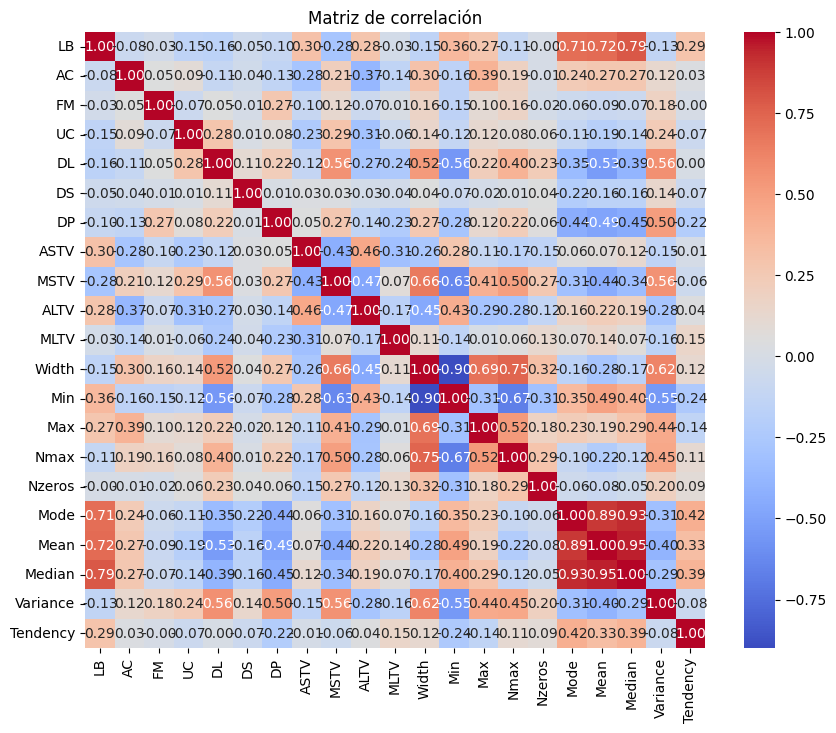

In [ ]:
atributos = [col for col in conjunto_final.columns if col != "Stage"]

correlation_matrix = datos[atributos].corr()  # corr() usa Pearson por defecto

# Mostrar la matriz
print(correlation_matrix)

# Opcional: heatmap más visual
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

                  LB            AC            FM            UC            DL  \
LB         96.754751 -3.101160e-03 -1.558670e-02 -4.300637e-03 -4.652671e-03   
AC         -0.003101  1.497853e-05  8.729300e-06  9.869258e-07 -1.264579e-06   
FM         -0.015587  8.729300e-06  2.188605e-03 -9.585494e-06  6.783473e-06   
UC         -0.004301  9.869258e-07 -9.585494e-06  8.648399e-06  2.464038e-06   
DL         -0.004653 -1.264579e-06  6.783473e-06  2.464038e-06  8.789758e-06   
DS         -0.000030 -9.604550e-09 -2.959220e-08  1.090781e-09  1.830888e-08   
DP         -0.000610 -2.941245e-07  7.354641e-06  1.316456e-07  3.944839e-07   
ASTV       51.375202 -1.858999e-02 -8.408567e-02 -1.179371e-02 -6.072249e-03   
MSTV       -2.423488  7.066679e-04  5.025514e-03  7.498019e-04  1.473208e-03   
ALTV       51.215817 -2.647403e-02 -6.416973e-02 -1.646723e-02 -1.474211e-02   
MLTV       -1.632331 -3.092499e-03  3.053765e-03 -1.032323e-03 -4.036752e-03   
Width     -56.288122  4.507030e-02  2.97

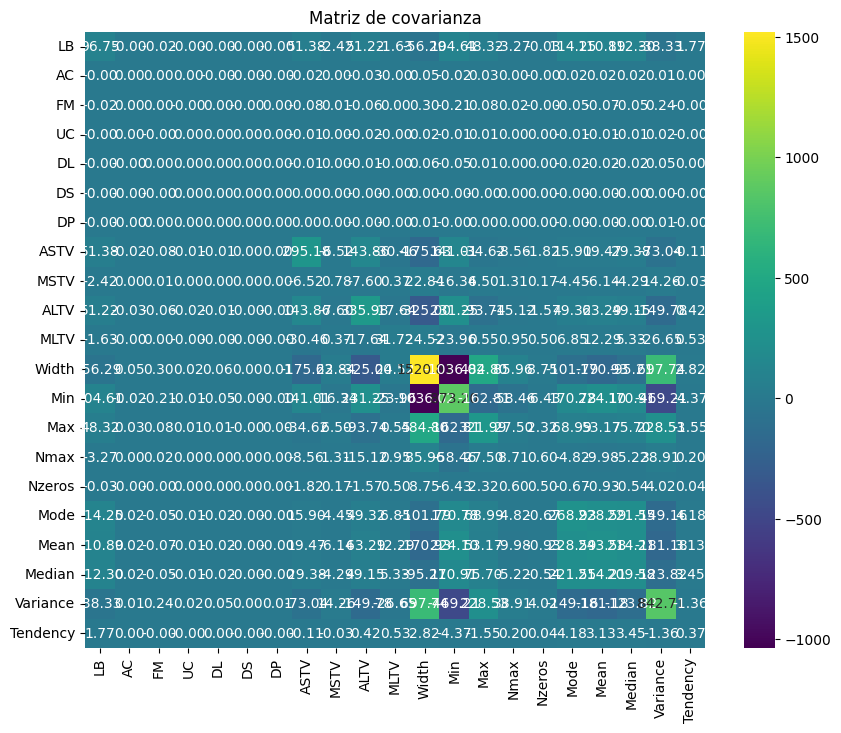

In [ ]:
matriz_covarianza = datos[atributos].cov()
print(matriz_covarianza)

# Opcional: heatmap
plt.figure(figsize=(10,8))
sns.heatmap(matriz_covarianza, annot=True, fmt=".2f", cmap="viridis")
plt.title("Matriz de covarianza")
plt.show()

In [124]:
datos = pd.read_csv("C:\\Users\\User\\Documents\\Proyecto integrador\\vertebral_column.csv")
datos.drop_duplicates(inplace=True)
datos.dropna(inplace=True)
#datos['NSP'] = datos['NSP'].replace({1: 'Normal', 2: 'Sospechoso', 3: 'Patologico'})
datos.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [125]:
n_filas = len(datos)

for column in datos.columns:
    unicos = datos[column].unique()
    n_unicos = len(unicos)
    
    # Si es categórica (tipo object/category) o es numérica con pocos únicos
    if (datos[column].dtype == 'object') or (len(unicos) <= 10):
        print(f"\nColumna '{column}' (candidata categórica): {n_unicos} valores únicos")
        
        
        for unico in unicos:
                count = len(datos[datos[column] == unico])
                normalizado = count / n_filas
                print(f"   Hay {normalizado:.2%} codificado en {unico}")
    else:
        print(f"\nColumna '{column}' tiene media: {datos[column].mean():.2f}, valor maximo: {datos[column].max():.2f} y valor minimo: {datos[column].min():.2f}")



Columna 'pelvic_incidence' tiene media: 60.50, valor maximo: 129.83 y valor minimo: 26.15

Columna 'pelvic_tilt' tiene media: 17.54, valor maximo: 49.43 y valor minimo: -6.55

Columna 'lumbar_lordosis_angle' tiene media: 51.93, valor maximo: 125.74 y valor minimo: 14.00

Columna 'sacral_slope' tiene media: 42.95, valor maximo: 121.43 y valor minimo: 13.37

Columna 'pelvic_radius' tiene media: 117.92, valor maximo: 163.07 y valor minimo: 70.08

Columna 'degree_spondylolisthesis' tiene media: 26.30, valor maximo: 418.54 y valor minimo: -11.06

Columna 'class' (candidata categórica): 3 valores únicos
   Hay 19.35% codificado en Hernia
   Hay 48.39% codificado en Spondylolisthesis
   Hay 32.26% codificado en Normal


In [126]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [127]:
datos.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   

                         

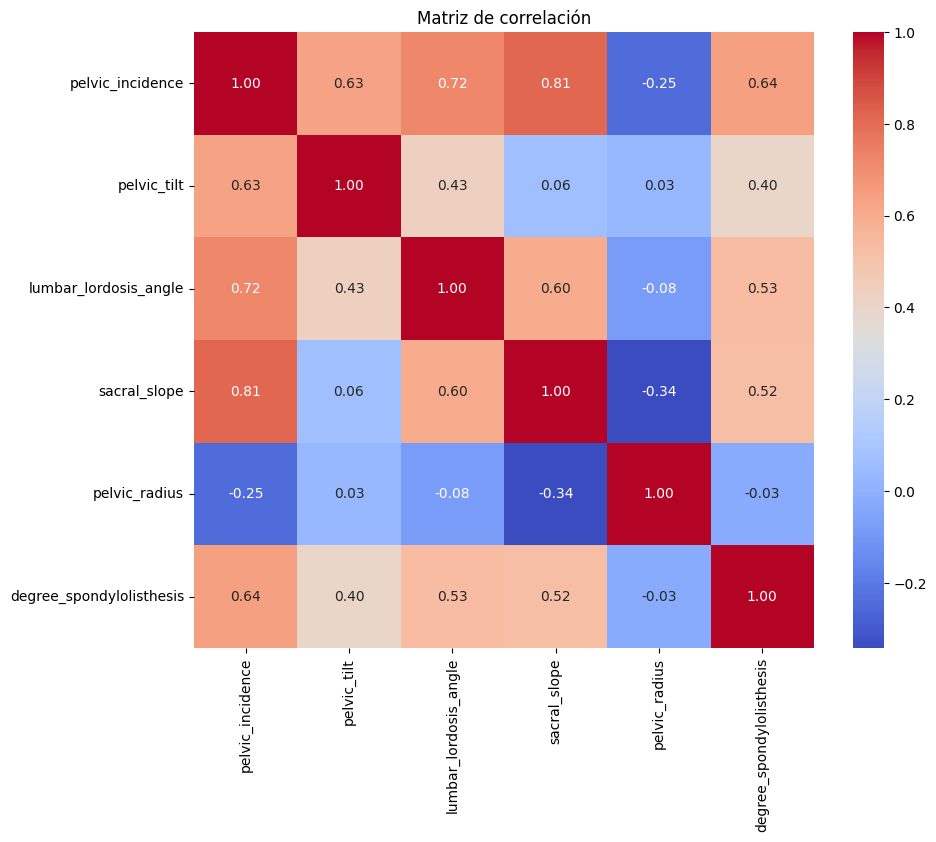

In [130]:
atributos = [col for col in datos.columns if col != "class"]

matriz_correlacion = datos[atributos].corr()  # corr() usa Pearson por defecto

# Mostrar la matriz
print(matriz_correlacion)

# Opcional: heatmap más visual
plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                297.097633   108.542318   
pelvic_tilt                     108.542318   100.166675   
lumbar_lordosis_angle           229.392280    80.362172   
sacral_slope                    188.555315     8.375643   
pelvic_radius                   -56.804919     4.354120   
degree_spondylolisthesis        413.513704   149.557681   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                     229.392280    188.555315     -56.804919   
pelvic_tilt                           80.362172      8.375643       4.354120   
lumbar_lordosis_angle                344.253290    149.030108     -19.852220   
sacral_slope                         149.030108    180.179672     -61.159039   
pelvic_radius                        -19.852220    -61.159039     177.352531   
degree_spondylolisthesis             371.897908    263.956023     -13.037396   

                         

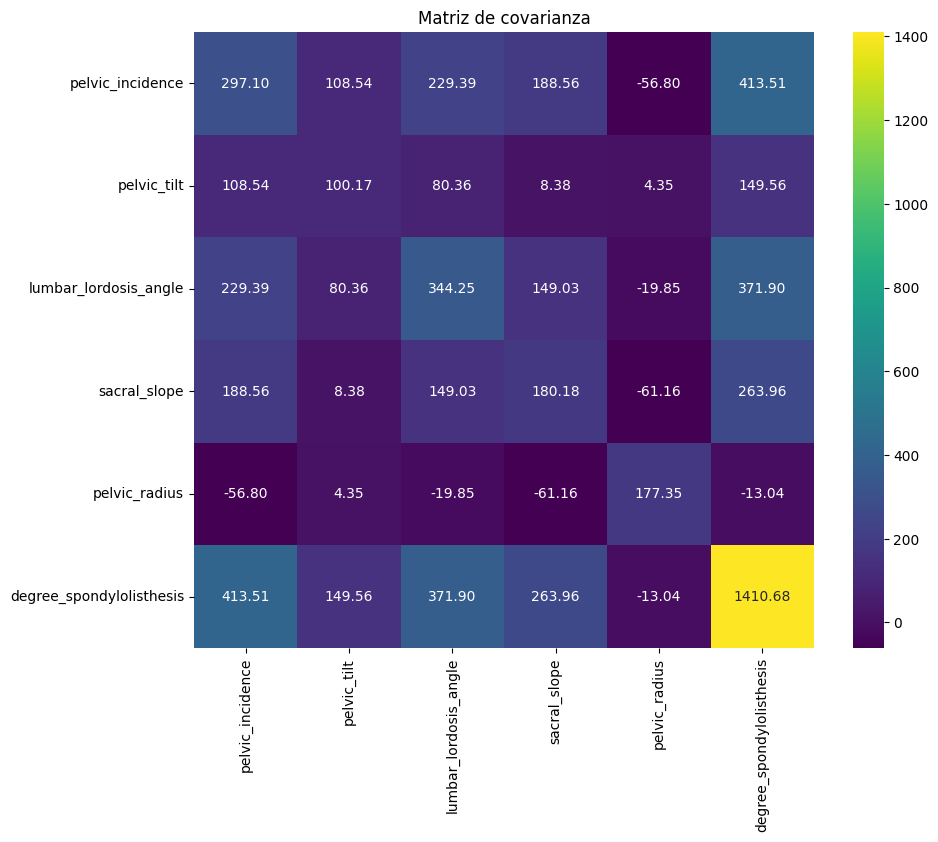

In [131]:
matriz_covarianza = datos[atributos].cov()
print(matriz_covarianza)

# Opcional: heatmap
plt.figure(figsize=(10,8))
sns.heatmap(matriz_covarianza, annot=True, fmt=".2f", cmap="viridis")
plt.title("Matriz de covarianza")
plt.show()

In [133]:
datos = pd.read_csv("C:\\Users\\User\\Documents\\Proyecto integrador\\heart.csv")
datos.drop_duplicates(inplace=True)
datos.dropna(inplace=True)
#datos['NSP'] = datos['NSP'].replace({1: 'Normal', 2: 'Sospechoso', 3: 'Patologico'})
datos.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [134]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [135]:
datos.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [136]:
n_filas = len(datos)

for column in datos.columns:
    unicos = datos[column].unique()
    n_unicos = len(unicos)
    
    # Si es categórica (tipo object/category) o es numérica con pocos únicos
    if (datos[column].dtype == 'object') or (len(unicos) <= 10):
        print(f"\nColumna '{column}' (candidata categórica): {n_unicos} valores únicos")
        
        
        for unico in unicos:
                count = len(datos[datos[column] == unico])
                normalizado = count / n_filas
                print(f"   Hay {normalizado:.2%} codificado en {unico}")
    else:
        print(f"\nColumna '{column}' tiene media: {datos[column].mean():.2f}, valor maximo: {datos[column].max():.2f} y valor minimo: {datos[column].min():.2f}")


Columna 'Age' tiene media: 53.51, valor maximo: 77.00 y valor minimo: 28.00

Columna 'Sex' (candidata categórica): 2 valores únicos
   Hay 78.98% codificado en M
   Hay 21.02% codificado en F

Columna 'ChestPainType' (candidata categórica): 4 valores únicos
   Hay 18.85% codificado en ATA
   Hay 22.11% codificado en NAP
   Hay 54.03% codificado en ASY
   Hay 5.01% codificado en TA

Columna 'RestingBP' tiene media: 132.40, valor maximo: 200.00 y valor minimo: 0.00

Columna 'Cholesterol' tiene media: 198.80, valor maximo: 603.00 y valor minimo: 0.00

Columna 'FastingBS' (candidata categórica): 2 valores únicos
   Hay 76.69% codificado en 0
   Hay 23.31% codificado en 1

Columna 'RestingECG' (candidata categórica): 3 valores únicos
   Hay 60.13% codificado en Normal
   Hay 19.39% codificado en ST
   Hay 20.48% codificado en LVH

Columna 'MaxHR' tiene media: 136.81, valor maximo: 202.00 y valor minimo: 60.00

Columna 'ExerciseAngina' (candidata categórica): 2 valores únicos
   Hay 59.59% 

                  Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
Age          1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612
RestingBP    0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803
Cholesterol -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148
FastingBS    0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698
MaxHR       -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691
Oldpeak      0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000


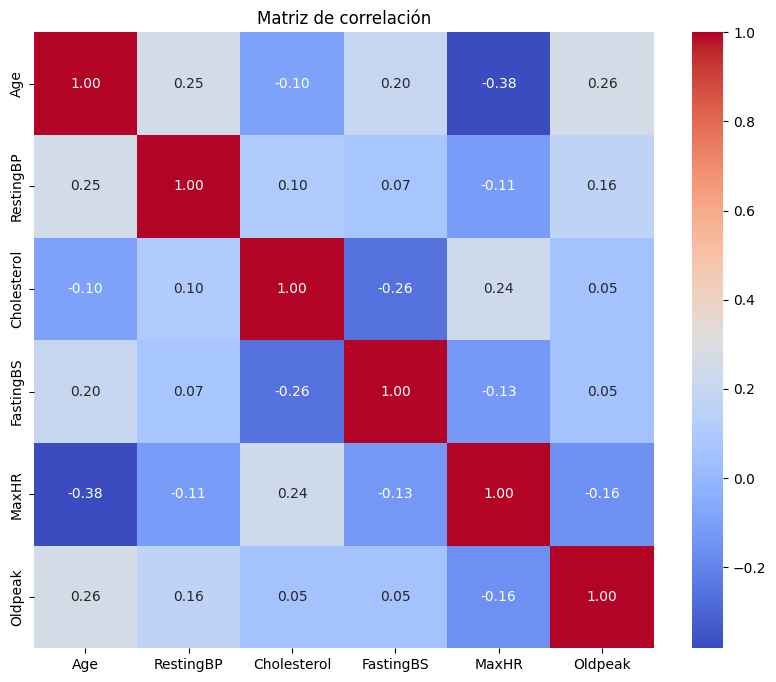

In [145]:
atributos = [col for col in datos.columns if col != "HeartDisease" and datos[col].dtype != 'object']

matriz_correlacion = datos[atributos].corr()  # corr() usa Pearson por defecto

# Mostrar la matriz
print(matriz_correlacion)

# Opcional: heatmap más visual
plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

                   Age   RestingBP   Cholesterol  FastingBS       MaxHR  \
Age          88.974254   44.427519    -98.309701   0.790260  -91.750920   
RestingBP    44.427519  342.773903    204.323837   0.549778  -52.857808   
Cholesterol -98.309701  204.323837  11964.891079 -12.076452  656.671673   
FastingBS     0.790260    0.549778    -12.076452   0.178968   -1.415709   
MaxHR       -91.750920  -52.857808    656.671673  -1.415709  648.228614   
Oldpeak       2.601774    3.254307      5.850572   0.023778   -4.363589   

              Oldpeak  
Age          2.601774  
RestingBP    3.254307  
Cholesterol  5.850572  
FastingBS    0.023778  
MaxHR       -4.363589  
Oldpeak      1.137572  


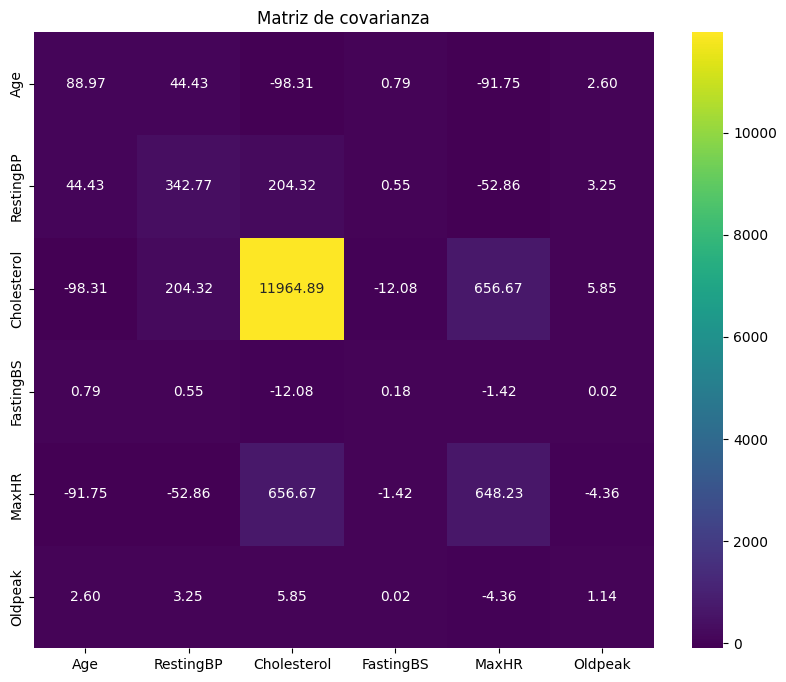

In [146]:
matriz_covarianza = datos[atributos].cov()
print(matriz_covarianza)

# Opcional: heatmap
plt.figure(figsize=(10,8))
sns.heatmap(matriz_covarianza, annot=True, fmt=".2f", cmap="viridis")
plt.title("Matriz de covarianza")
plt.show()